In [1]:
from metric_voting import Spatial 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]
colors2 = colors[:6] + colors[-12::2]
custom_colors = ListedColormap(colors2)

In [3]:
n = 10
m = 4

k = 1

In [4]:
# define the single set of voter and candidate parameters
voter_params = {'loc': [0,0], 'scale': 1, 'size': 2}
candidate_params = {'loc': [0,0], 'scale': 1, 'size': 2}

# define a distance function between voters and candidates
distance = lambda point1, point2: np.linalg.norm(point1 - point2)

# Create the group spatial generator object!
gaussian_generator = Spatial(
    voter_dist = np.random.normal, 
    voter_params = voter_params,
    candidate_dist = np.random.normal, 
    candidate_params = candidate_params,
    distance = distance
)

In [5]:
# Now each call .generate() will make a profile with random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = gaussian_generator.generate(m=m, n=n)

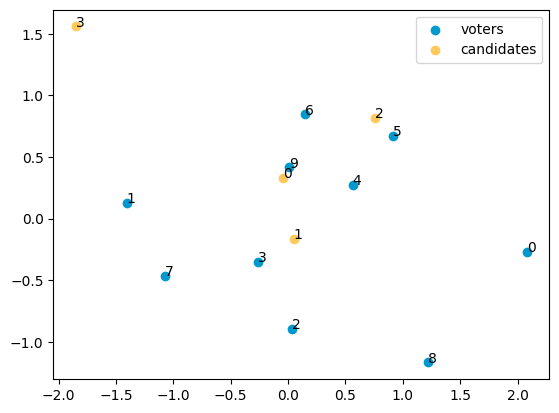

In [6]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(x=voter_positions[:,0], y=voter_positions[:,1], label = 'voters', color = colors[0]) 
for i in range(n):
    plt.text(
        voter_positions[i,0], 
        voter_positions[i,1], 
        i,
    )
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = colors[1])
for i in range(m):
    plt.text(
        candidate_positions[i,0], 
        candidate_positions[i,1], 
        i,
    )
plt.legend()

In [7]:
profile

array([[2, 0, 1, 1, 2, 2, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 2, 0, 0, 1],
       [0, 3, 2, 2, 1, 1, 1, 3, 2, 2],
       [3, 2, 3, 3, 3, 3, 3, 2, 3, 3]])

Equation for computing the score:

$$
\text{cost}(B,S) = \sum_{v\in B}\sum_{c\in S} d(v,c)
$$ 


$T$ is the winner set of candidates

$$
\Phi_{prop}(B, T) = \underset{\substack{S\subseteq T\\ |S| = floor(|T|\cdot |B|/n)}}{\text{arg min}} \text{cost}(B,S)
$$

Let $W$ be a winner set of candidates
$$
I(B) = \frac{cost(B, \Phi(B, W))}{cost(B, \Phi(B, C))}
$$

In [8]:
from metric_voting import costs

In [9]:
costs(voter_positions, candidate_positions)

array([11.05482235, 10.79514253, 13.9238128 , 27.62719021])

In [10]:
voter_positions.shape

(10, 2)

In [11]:
voter_positions[np.newaxis, :, :]

array([[[ 2.08083006, -0.27086221],
        [-1.40594696,  0.13021935],
        [ 0.03564842, -0.89413553],
        [-0.26496079, -0.34890565],
        [ 0.56346863,  0.27313564],
        [ 0.91461292,  0.66916165],
        [ 0.14698822,  0.84624976],
        [-1.07189016, -0.46469428],
        [ 1.22194194, -1.16772159],
        [ 0.00837768,  0.41726313]]])

In [12]:
candidate_positions.shape

(4, 2)

In [13]:
candidate_positions[:, np.newaxis, :]

array([[[-0.04092518,  0.32834481]],

       [[ 0.04712161, -0.16600435]],

       [[ 0.76075957,  0.81646227]],

       [[-1.85036471,  1.55931029]]])

In [14]:
diffs = voter_positions[np.newaxis, :, :] - candidate_positions[:, np.newaxis, :]

In [15]:
diffs.shape

(4, 10, 2)

In [16]:
from metric_voting.utils import borda_matrix, remove_candidates

In [17]:
profile

array([[2, 0, 1, 1, 2, 2, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 2, 0, 0, 1],
       [0, 3, 2, 2, 1, 1, 1, 3, 2, 2],
       [3, 2, 3, 3, 3, 3, 3, 2, 3, 3]])

In [18]:
borda_matrix(profile)

array([[2., 4., 3., 3., 3., 3., 4., 3., 3., 4.],
       [3., 3., 4., 4., 2., 2., 2., 4., 4., 3.],
       [4., 1., 2., 2., 4., 4., 3., 1., 2., 2.],
       [1., 2., 1., 1., 1., 1., 1., 2., 1., 1.]])

In [19]:
remove_candidates(profile, [1,3])

array([[2, 0, 0, 0, 2, 2, 0, 0, 0, 0],
       [0, 2, 2, 2, 0, 0, 2, 2, 2, 2]])

In [20]:
def rc(profile, cands):
    return np.array(
        [
            row[~np.isin(row, cands)] 
            for row in profile.T
        ]
    ).T


(rc(profile, [1,3]) == remove_candidates(profile, [1,3])).all()

np.True_

In [21]:
arr = [
[1,2,3,4,5],
[1,2,3,4,5],
[1,2,3,4,5],
[1,2,3,4,5],
[1,2,3,4,5],
]

np.vstack(arr)

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [22]:
from metric_voting import GroupSpatial


gs = GroupSpatial(voter_groups=2, candidate_groups=2)

In [23]:
gs.generate(3,2,[2,1],[1,1])

(array([[1, 0, 1],
        [0, 1, 0]]),
 array([[0.78496873, 0.04545649],
        [0.78524626, 0.78850664]]),
 array([[0.70379209, 0.45336577],
        [0.30934028, 0.22119812],
        [0.19389455, 0.68246929]]),
 array([0, 0, 1]))

In [28]:
from metric_voting import SNTV, Bloc

In [32]:
profile = np.array([
       [1, 3, 1, 3, 3, 0, 2, 3, 2, 1],
       [0, 0, 0, 0, 0, 1, 3, 0, 0, 0],
       [3, 2, 3, 2, 1, 3, 0, 2, 3, 3],
       [2, 1, 2, 1, 2, 2, 1, 1, 1, 2]
    ])


In [34]:
Bloc(profile=profile, k=2)

array([0, 3])

In [31]:
profile

array([[2, 0, 1, 1, 2, 2, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 2, 0, 0, 1],
       [0, 3, 2, 2, 1, 1, 1, 3, 2, 2],
       [3, 2, 3, 3, 3, 3, 3, 2, 3, 3]])